14
0
Accuracy of training model is: 0.8435114503816794
Accuracy of testing model is: 0.8484848484848485
Accuracy: 0.8484848484848485
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.88      0.83      0.86        36

    accuracy                           0.85        66
   macro avg       0.85      0.85      0.85        66
weighted avg       0.85      0.85      0.85        66



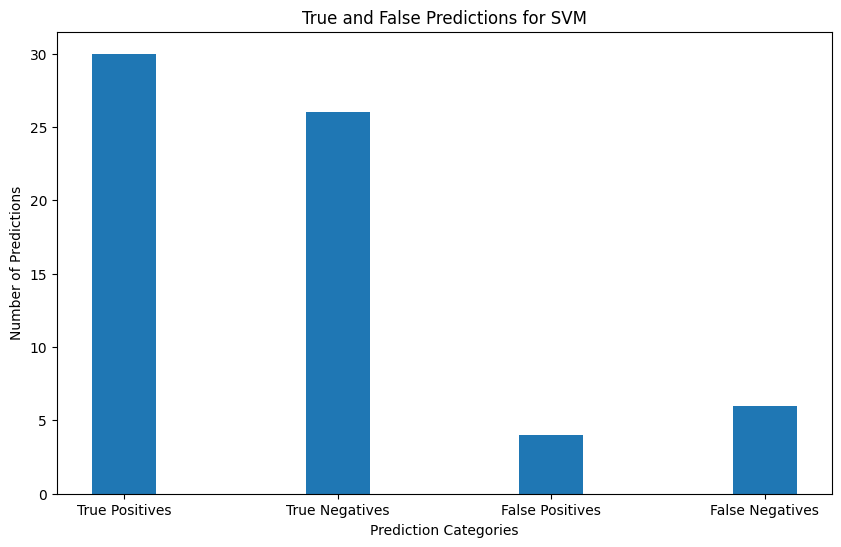

In [2]:
# Support Vector Machine
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

# Read the CSV file through pandas
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HD/Heart Disease Dataset.csv")


# Check for missing values
print(data.isnull().sum().sum())

# Fill missing values with mean value of each column
data.fillna(data.mean(), inplace=True)
print(data.isnull().sum().sum())

# Convert continuous target variable into binary values
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

# Prepare input and output data
x = data[['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
          'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
y = data['num'].values

# Apply feature scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Feature selection
selector = SelectKBest(f_classif, k=8)  # Select top 8 features
x_selected = selector.fit_transform(x_scaled, y)

# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_selected, y)

# Prepare training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Train model with support vector machine
param_grid_svm = {'C': [0.01, 0.1, 1, 10, 100],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'degree': [2, 3, 4, 5],
                  'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(), param_grid_svm, cv=5)
svm_grid.fit(x_train, y_train)
model = svm_grid.best_estimator_

# Prediction on testing data
y_pred = model.predict(x_test)

# Calculate training and testing accuracy of the model
acc_train = model.score(x_train, y_train)
print("Accuracy of training model is:", acc_train)

acc_test = model.score(x_test, y_test)
print("Accuracy of testing model is:", acc_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score, recall, and precision for SVM
report_svm = classification_report(y_test, y_pred)
print("Classification Report for SVM:\n", report_svm)

# Create a confusion matrix for SVM
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Plot the bar graph for true and false predictions
categories = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
plt.figure(figsize=(10, 6))
plt.bar(categories, [tp, tn, fp, fn], width=0.3)
plt.xlabel('Prediction Categories')
plt.ylabel('Number of Predictions')
plt.title('True and False Predictions for SVM')
plt.show()